# Assignment1 - Question 1  (Alejandro A. - 301195788)
---

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
def display_digit(X, y):
    image = np.reshape(X, (28, 28))
    plt.title(f"Label: {y}")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

---

## 1. Retrieve & load mnist_784

In [3]:
mnist = fetch_openml(data_id=554)

In [5]:
X = mnist.data
y = mnist.target

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

---

## 2. Display each digit

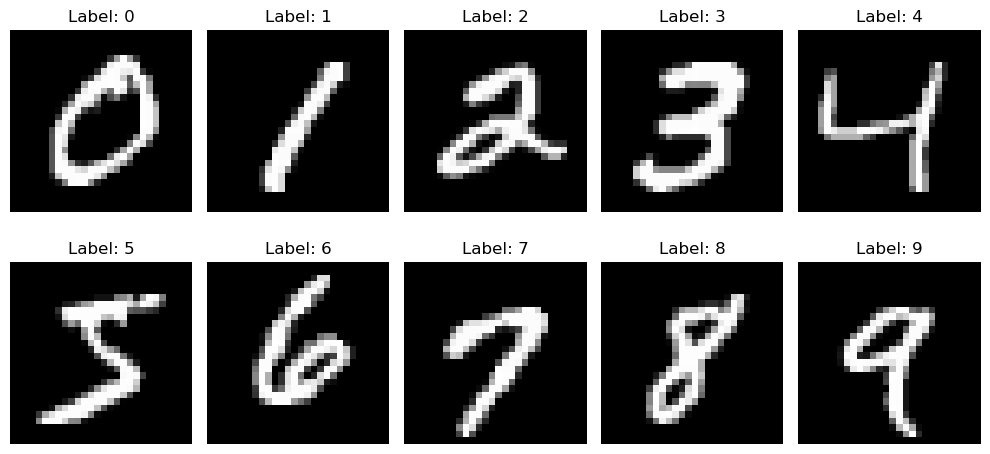

In [11]:
plt.figure(figsize=(10, 5))
for digit in range(10):
    index = np.where(y == str(digit))[0][0]
    plt.subplot(2, 5, digit + 1)
    display_digit(X.iloc[index].to_numpy(), y.iloc[index])
plt.tight_layout()
plt.show()

---

## 3. Use PCA to Get 1st & 2nd principal components and output their explained variance ratio

In [25]:
pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X)

In [26]:
X_pca_sklearn.shape

(70000, 2)

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.09746116 0.07155445]


---

## 4. Plot first and second principal components onto 1D hyperplane

In [28]:
pc1 = X_pca_sklearn[:, 0]
pc2 = X_pca_sklearn[:, 1]

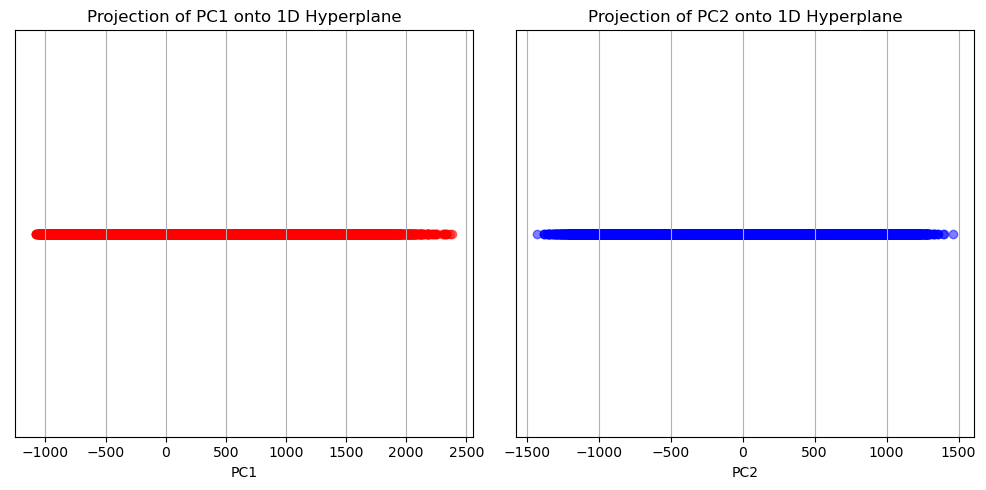

In [29]:
plt.figure(figsize=(10, 5))

# Plot first PC
plt.subplot(1, 2, 1)
plt.scatter(pc1, np.zeros_like(pc1), alpha=0.5, c='red', label='PC1')
plt.title('Projection of PC1 onto 1D Hyperplane')
plt.xlabel('PC1')
plt.yticks([])  # Remove y-axis ticks as it's a 1D plot
plt.grid(True)

# Plot second PC
plt.subplot(1, 2, 2)
plt.scatter(pc2, np.zeros_like(pc2), alpha=0.5, c='blue', label='PC2')
plt.title('Projection of PC2 onto 1D Hyperplane')
plt.xlabel('PC2')
plt.yticks([])  # Remove y-axis ticks as it's a 1D plot
plt.grid(True)

plt.tight_layout()
plt.show()

---

## 5. Use Incremental PCA to reduce dimension to 154

In [8]:
inc_pca = IncrementalPCA(n_components=154)
X_ipca_sklearn = inc_pca.fit_transform(X)

In [10]:
sum(inc_pca.explained_variance_ratio_)

0.9500165146603072

In [31]:
X_ipca_sklearn.shape

(70000, 154)

---

## 6. Display original and compressed digits

In [33]:
X_compressed = inc_pca.inverse_transform(X_ipca_sklearn)

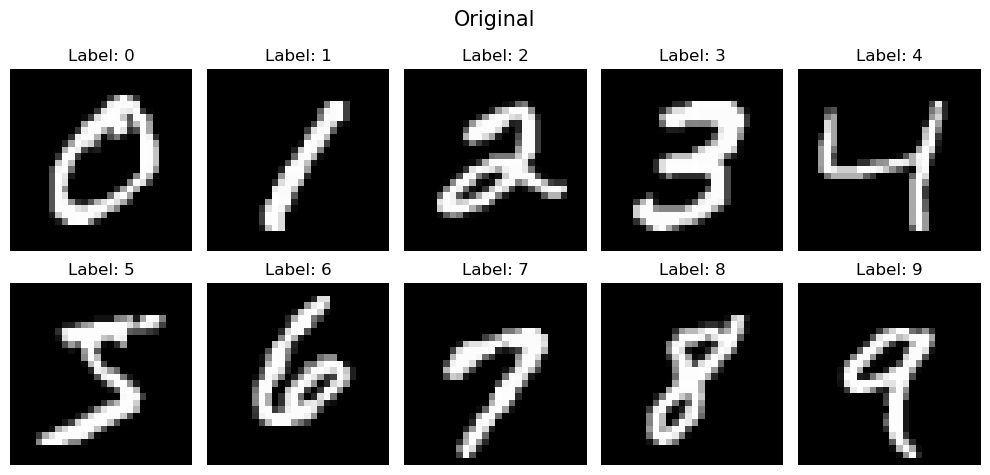

In [34]:
plt.figure(figsize=(10, 5))
for digit in range(10):
    index = np.where(y == str(digit))[0][0]
    plt.subplot(2, 5, digit + 1)
    display_digit(X.iloc[index].to_numpy(), y.iloc[index])
plt.suptitle('Original', fontsize=15)
plt.tight_layout()
plt.show()

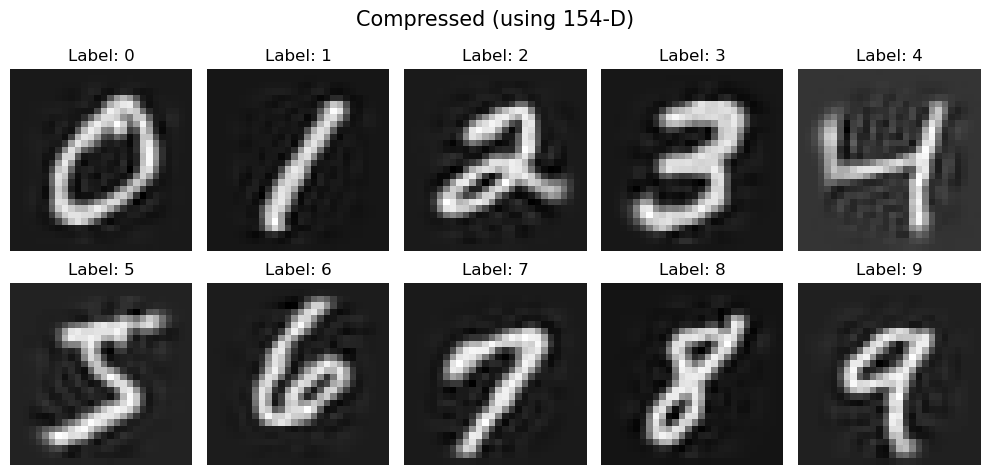

In [35]:
plt.figure(figsize=(10, 5))
for digit in range(10):
    index = np.where(y == str(digit))[0][0]
    plt.subplot(2, 5, digit + 1)
    display_digit(X_reverted[index], y.iloc[index])
plt.suptitle('Compressed (using 154-D)', fontsize=15)
plt.tight_layout()
plt.show()

In [67]:
# Function to display original vs compressed image given the row index of the dataset
def original_vs_compressed(original, compressed, index):
    label = y[index]
    plt.figure(figsize=(6, 3))
    # Original
    plt.subplot(1, 2, 1)
    display_digit(original[index], label)
    # Compressed
    plt.subplot(1, 2, 2)
    display_digit(compressed[index], label)
    plt.suptitle('Original vs Compressed', fontsize=15)
    plt.tight_layout()

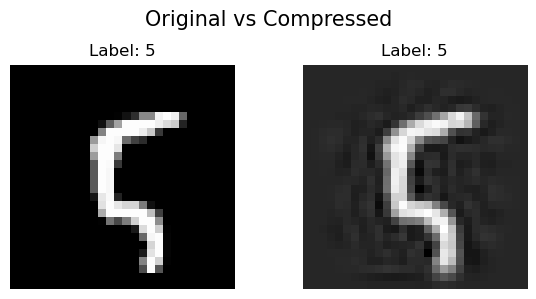

In [70]:
original_vs_compressed(X.to_numpy(), X_compressed, 100)

---